In [1]:
import sys
sys.path.append('../src')

In [2]:
from loading import *
from helpers import top_signals
from visualization import *
from scipy import fftpack

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 2,all_seizures=False, delta=1)

Seizure starts (s):  [[824604.12214844]
 [837451.78589844]]
Seizure ends (s):  [[824690.37769531]
 [837541.65542969]]
Duration (s):  [[86.25554687]
 [89.86953125]]
Sampled frequency (Hz):  512
Start/end [824604.12214844] [824690.37769531]
EEG files:  [['../data/ID02/ID02_229h.mat', '../data/ID02/ID02_230h.mat', '../data/ID02/ID02_231h.mat']]
Hour of seizure:  [array([229, 230, 231])]
Samples ranges:  [(104510, 148673), (1152914, 1198927)]


In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"]

In [5]:
top_power_eeg = top_signals(eegs,ranges)
eeg = eegs[0][1][top_power_eeg]

In [6]:
print(eeg.T.shape)

(1843200, 1)


In [7]:
print("start: ", ranges[0][0])
print("end: ", ranges[0][1])
print("duration: ", ranges[0][1]-ranges[0][0])

start:  104510
end:  148673
duration:  44163


## FFT during all record

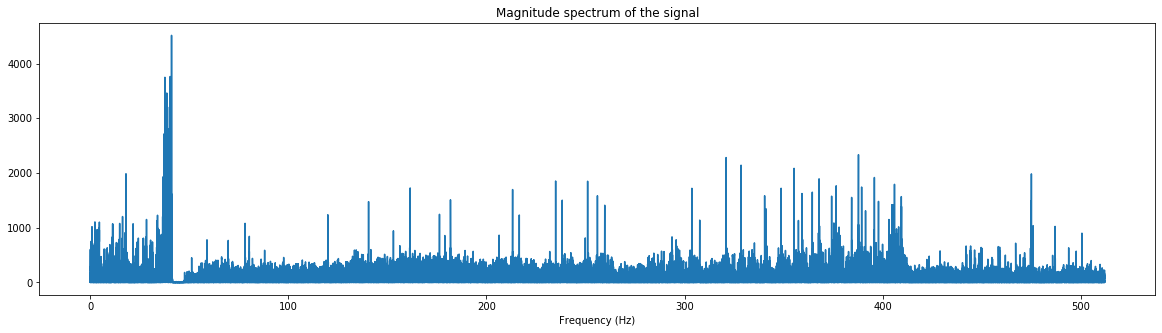

In [8]:
f_s = 512

fft1 = scipy.fft(eeg.T)
f = np.linspace (0,f_s,len(eeg.T), endpoint=False)
plt.figure(1,figsize=(20,5))
plt.plot (f, abs (fft1))
plt.title ('Magnitude spectrum of the signal')
plt.xlabel ('Frequency (Hz)')
plt.show()

## FFT during normal activity

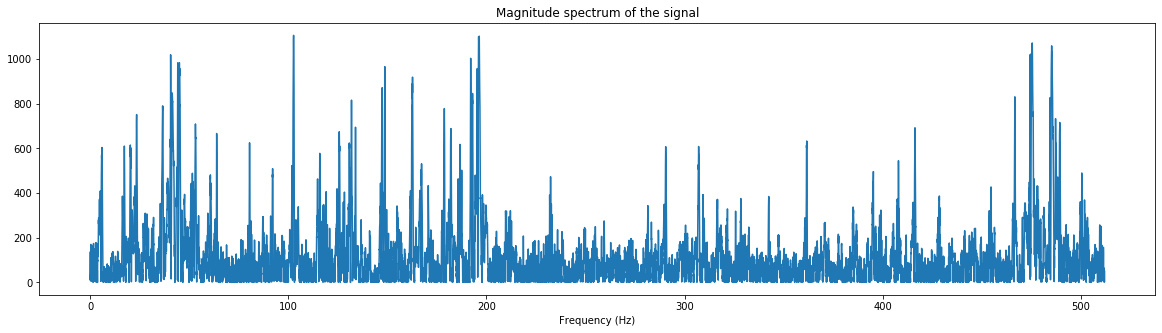

In [9]:
f_s = 512

fft1 = scipy.fft(eeg.T[:44163])
f = np.linspace (0,f_s,len(eeg.T[:44163]), endpoint=False)
plt.figure(1,figsize=(20,5))
plt.plot (f, abs (fft1))
plt.title ('Magnitude spectrum of the signal')
plt.xlabel ('Frequency (Hz)')
plt.show()


## FFT during seizure

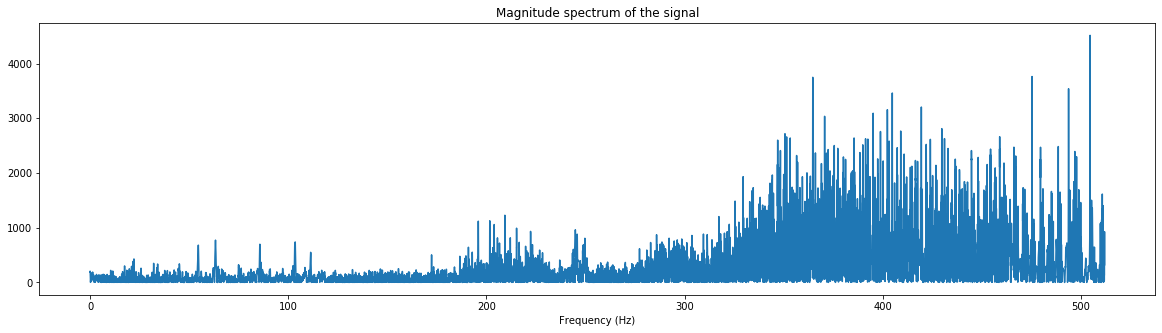

In [10]:
f_s = 512

fft1 = scipy.fft(eeg.T[ranges[0][0]:ranges[0][1]])
f = np.linspace (0,f_s,len(eeg.T[ranges[0][0]:ranges[0][1]]), endpoint=False)
plt.figure(1,figsize=(20,5))
plt.plot (f, abs (fft1))
plt.title ('Magnitude spectrum of the signal')
plt.xlabel ('Frequency (Hz)')
plt.show()

In [11]:
from numpy import *
from scipy.signal import *
from numpy.fft import * 
from matplotlib import *
from scipy import *
from pylab import *

def plot_power_bands(eeg, start, end):
    y = eeg.T[start:end,0]        # the signal, study channel 'ch'
    L = len(y)            # signal length
    fs = 512.0              # sampling rate
    T = 1/fs                # sample time
    t= linspace(1,L,L)*T   # time vector

    f = fs*linspace(0,L/10,L/10)/L  # single side frequency vector, real frequency up to fs/2
    Y = fft(y)

    figure()
    filtered = []
    b= [] # store filter coefficient
    cutoff = [0.5,4.0,7.0,12.0,30.0,100.0]

    for band in range(0, len(cutoff)-1):
        wl = 2*cutoff[band]/fs*pi
        wh = 2*cutoff[band+1]/fs*pi
        M = 512      # Set number of weights as 128
        bn = zeros(M)

        for i in range(0,M):     # Generate bandpass weighting function
            n = i-  M/2       # Make symmetrical
            if n == 0:
                bn[i] = wh/pi - wl/pi;
            else:
                bn[i] = (sin(wh*n))/(pi*n) - (sin(wl*n))/(pi*n)   # Filter impulse response

        bn = bn*kaiser(M,5.2)  # apply Kaiser window, alpha= 5.2
        b.append(bn)

        [w,h]=freqz(bn,1)
        print(len(bn), len(y))
        filtered.append(convolve(bn, y)) # filter the signal by convolving the signal with filter coefficients

    # plotting normal signal
    figure(figsize=[16, 10])
    subplot(2, 1, 1)
    plot(t,y)

    # Plotting band signals
    for i in range(0, len(filtered)):
        y_p = filtered[i]
        print(len(y_p),M/2,L+M/2 )
        plot(t,y_p[ int(M/2):int(L+M/2)])
    axis('tight')
    title('Time domain')
    xlabel('Time (seconds)')

    # Plotting FFT for each bands
    subplot(2, 1, 2)
    plot(f,2*abs(Y[0:int(L/10)]))
    for i in range(0, len(filtered)):
        Y = filtered[i]
        Y = fft(Y [ int(M/2):int(L+M/2)])
        plot(f,abs(Y[0:int(L/10)]))
    axis('tight')
    legend(['original','delta band, 0-4 Hz','theta band, 4-7 Hz','alpha band, 7-12 Hz','beta band, 12-30 Hz', 'gamma band, 30-100Hz'])

    for i in range(0, len(filtered)):   # plot filter's frequency response
        H = abs(fft(b[i], L))
        H = H*1.2*(max(Y)/max(H))
        plot(f, 3*H[0:int(L/10)], 'k')    
    axis('tight')
    title('Frequency domain')
    xlabel('Frequency (Hz)')
    subplots_adjust(left=0.04, bottom=0.04, right=0.99, top=0.97)

512 44163
512 44163
512 44163
512 44163
512 44163
44674 256.0 44419.0
44674 256.0 44419.0
44674 256.0 44419.0
44674 256.0 44419.0
44674 256.0 44419.0


/Users/sinitame/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

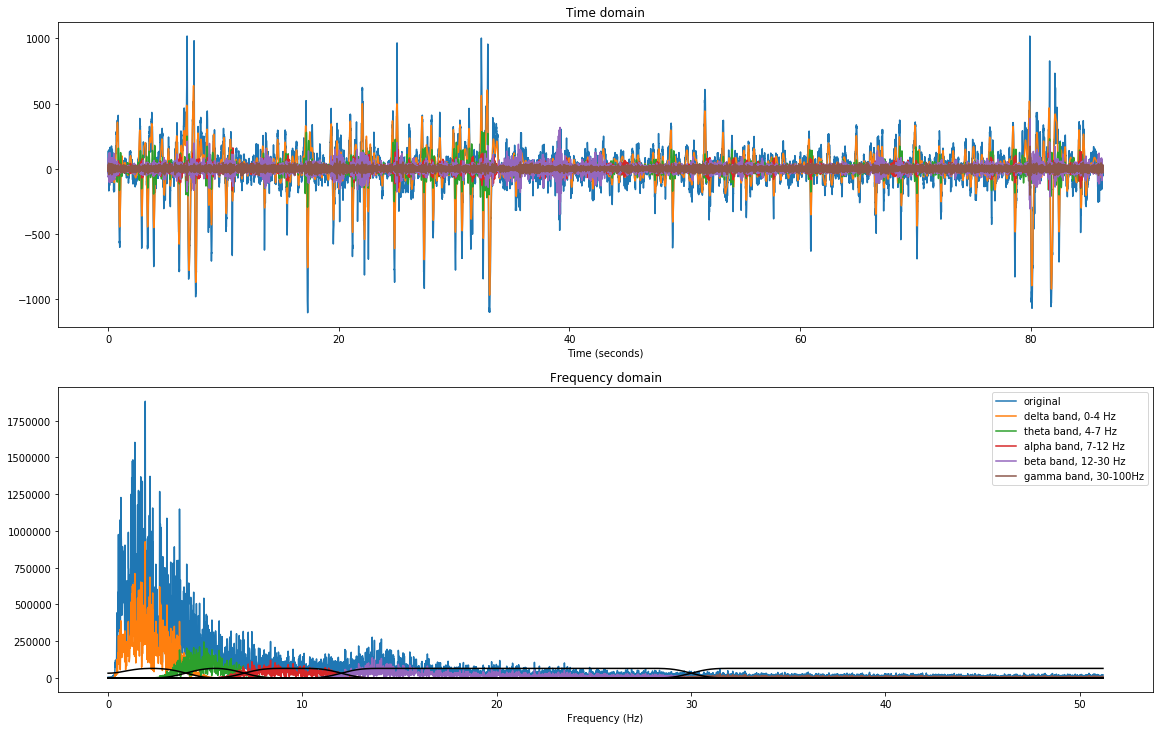

In [12]:
plot_power_bands(eeg, 0, 44163)

512 44163
512 44163
512 44163
512 44163
512 44163
44674 256.0 44419.0
44674 256.0 44419.0
44674 256.0 44419.0
44674 256.0 44419.0
44674 256.0 44419.0


<Figure size 432x288 with 0 Axes>

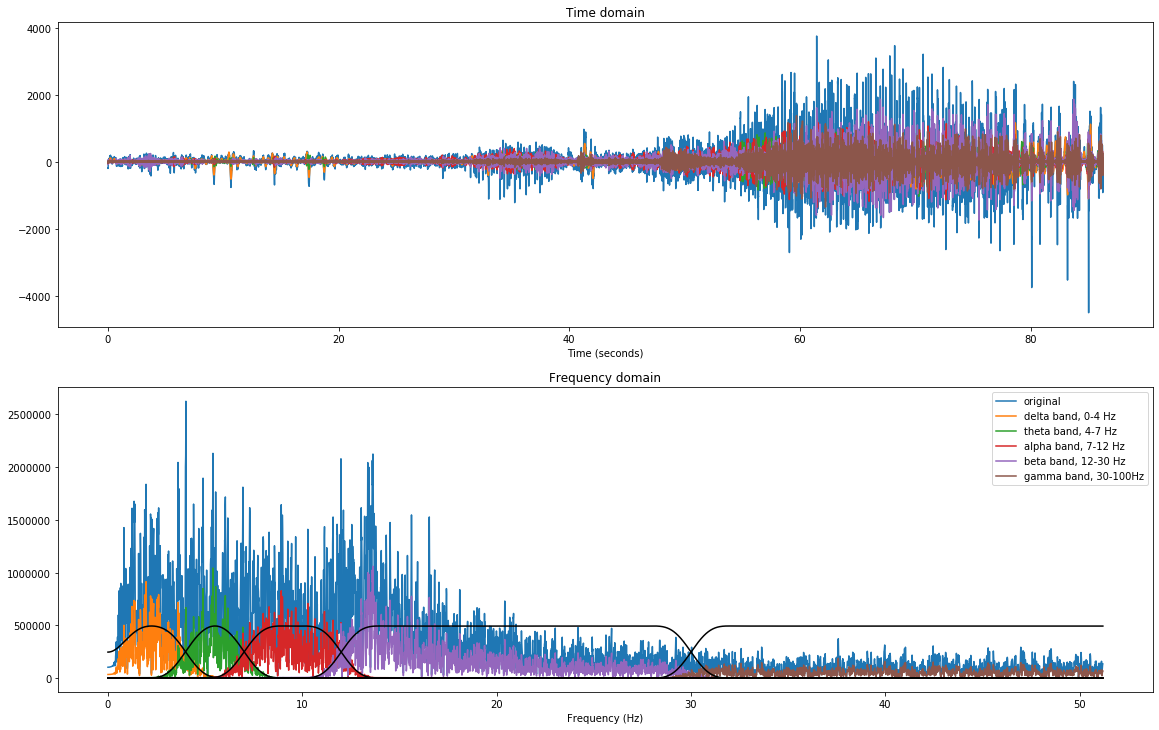

In [13]:
plot_power_bands(eeg, ranges[0][0], ranges[0][1])